# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section


For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [3]:
# Run this cell to load the dataset

train = loadmat('/content/gdrive/MyDrive/Colab/Data/train_32x32.mat')
test = loadmat('/content/gdrive/MyDrive/Colab/Data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
x_train = np.moveaxis(train['X'], -1, 0)
y_train = train['y']
x_test = np.moveaxis(test['X'], -1, 0)
y_test = test['y']
print("x_train shape is: ", x_train.shape)
print("y_train shape is: ", y_train.shape)
print("x_test shape is: ", x_test.shape)
print("y_test shape is: ", y_test.shape)

x_train shape is:  (73257, 32, 32, 3)
y_train shape is:  (73257, 1)
x_test shape is:  (26032, 32, 32, 3)
y_test shape is:  (26032, 1)


In [46]:
## a function to plot images and corrosponding labels

def plot_n_images(x,y,n,cmap=None):
  '''
  x: image dataset
  y: label dataset
  n: number of images to plot
  cmap: color map
  '''

  fig, axis = plt.subplots(1,n,figsize=(20,30))
  idx = list(range(x.shape[0]))
  np.random.shuffle(idx)
  for i, index in enumerate(idx[:n]):
    axis[i].axis('off')
    axis[i].imshow(np.squeeze(x[index]), cmap=cmap)
    axis[i].set_title(str(np.squeeze(y[index])))

Sample images from training data


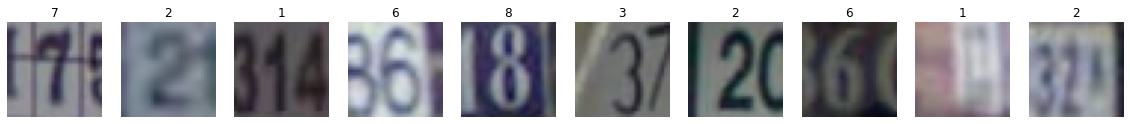

In [44]:
# plot smaple train images
print("Sample images from training data")
plot_n_images(x_train, y_train, 10)

In [7]:
# converting to gray scale images
x_gray_train = np.mean(x_train, axis = 3, keepdims=True)
x_gray_test = np.mean(x_test, axis = 3, keepdims=True)
train_y = y_train - 1
test_y = y_test - 1

print("x_gray_train shape is: ", x_gray_train.shape)
print("x_gray_test shape is: ", x_gray_test.shape)
print("train_y shape is: ", train_y.shape)
print("test_y shape is: ", test_y.shape)

x_gray_train shape is:  (73257, 32, 32, 1)
x_gray_test shape is:  (26032, 32, 32, 1)
train_y shape is:  (73257, 1)
test_y shape is:  (26032, 1)


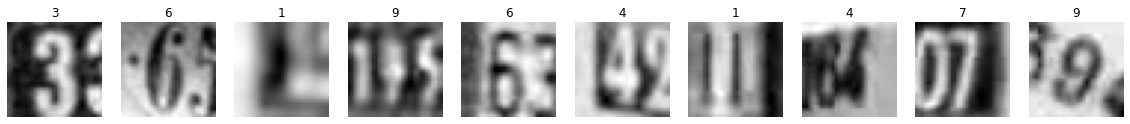

In [48]:
#plot gray scale images
plot_n_images(x_gray_train, y_train, 10, cmap='gray')

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [9]:
# make the model
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape = (32,32,1), name = "flatten_1"))
  model.add(Dense(256, activation ='relu', name = 'dense_1'))
  model.add(Dense(64, activation ='relu', name = 'dense_2'))
  model.add(Dense(32, activation = 'relu', name = 'dense_3'))
  model.add(Dense(10, activation = 'softmax', name = 'dense_4'))
  return model

In [10]:
# summary of model
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 281,258
Trainable params: 281,258
Non-trainable params: 0
_________________________________________________________________


In [57]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [58]:
# using callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_check = ModelCheckpoint(frequency='epoch',
                              monitor = 'val_accuracy',
                              save_best_only = True,
                              save_weights_only = True,
                              filepath = '/content/gdrive/MyDrive/Colab/Weights/SVHN/svhn_cp_mlp.h5')

early_stop = EarlyStopping(monitor = 'val_accuracy',
                           patience = 10)

In [59]:
# training the model
history = model.fit(x_gray_train, train_y,
                    batch_size = 64,
                    epochs = 100,
                    callbacks = [model_check, early_stop],
                    validation_split = 0.2)

Epoch 1/100
916/916 [==============================] - 4s 4ms/step - loss: 10.1871 - accuracy: 0.1578 - val_loss: 5.3984 - val_accuracy: 0.1958
Epoch 2/100
916/916 [==============================] - 4s 4ms/step - loss: 4.4548 - accuracy: 0.2488 - val_loss: 3.6187 - val_accuracy: 0.2958
Epoch 3/100
916/916 [==============================] - 4s 4ms/step - loss: 3.2752 - accuracy: 0.3325 - val_loss: 2.8068 - val_accuracy: 0.3765
Epoch 4/100
916/916 [==============================] - 3s 4ms/step - loss: 2.7128 - accuracy: 0.3942 - val_loss: 2.6392 - val_accuracy: 0.3988
Epoch 5/100
916/916 [==============================] - 4s 4ms/step - loss: 2.3033 - accuracy: 0.4504 - val_loss: 2.8077 - val_accuracy: 0.3607
Epoch 6/100
916/916 [==============================] - 4s 4ms/step - loss: 2.0815 - accuracy: 0.4850 - val_loss: 2.0591 - val_accuracy: 0.4811
Epoch 7/100
916/916 [==============================] - 3s 4ms/step - loss: 1.8953 - accuracy: 0.5161 - val_loss: 1.8622 - val_accuracy: 0.509

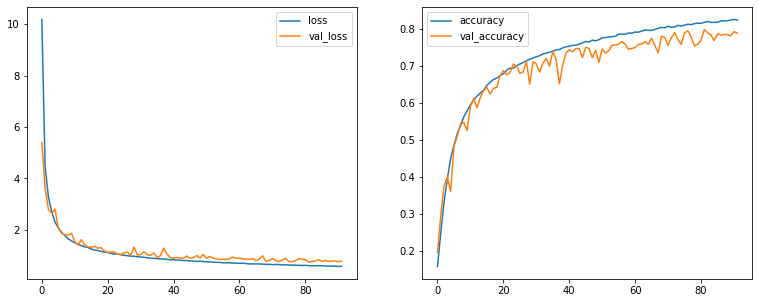

In [60]:
def plot_metrics(h):
  fig, axis = plt.subplots(1,2, figsize=(13,5))

  axis[0].plot(h['loss'], label='loss')
  axis[0].plot(h['val_loss'], label='val_loss')
  axis[0].legend()

  axis[1].plot(h['accuracy'], label='accuracy')
  axis[1].plot(h['val_accuracy'], label='val_accuracy')
  axis[1].legend()

plot_metrics(history.history)

In [62]:
loss, acc = model.evaluate(x_gray_test, test_y)
print("test_data loss is: ", loss)
print("test_data accuracy is: ", acc)

814/814 [==============================] - 1s 1ms/step - loss: 0.9355 - accuracy: 0.7758
test_data loss is:  0.9354829788208008
test_data accuracy is:  0.7757759690284729


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [97]:
def get_cnn_model():
  model = Sequential()
  model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
  model.add(AvgPool2D(pool_size=(2,2)))
  model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
  model.add(AvgPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


In [98]:
cnn_model = get_cnn_model()
cnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_12 (Dense)             (None, 84)              

In [99]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [101]:
# using callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_check = ModelCheckpoint(frequency='epoch',
                              monitor = 'val_accuracy',
                              save_best_only = True,
                              save_weights_only = True,
                              filepath = '/content/gdrive/MyDrive/Colab/Weights/SVHN/svhn_cp_cnn.h5')

early_stop = EarlyStopping(monitor = 'val_accuracy',
                           patience = 15)

In [102]:
# training the model
history_cnn = cnn_model.fit(x_gray_train, train_y,
                    batch_size = 64,
                    epochs = 100,
                    callbacks = [model_check, early_stop],
                    validation_split = 0.2)

Epoch 1/100
916/916 [==============================] - 31s 34ms/step - loss: 6.1148 - accuracy: 0.1971 - val_loss: 2.5237 - val_accuracy: 0.2763
Epoch 2/100
916/916 [==============================] - 31s 34ms/step - loss: 2.1267 - accuracy: 0.3556 - val_loss: 1.7965 - val_accuracy: 0.4398
Epoch 3/100
916/916 [==============================] - 30s 33ms/step - loss: 1.5973 - accuracy: 0.4965 - val_loss: 1.4451 - val_accuracy: 0.5524
Epoch 4/100
916/916 [==============================] - 30s 33ms/step - loss: 1.3192 - accuracy: 0.5913 - val_loss: 1.2429 - val_accuracy: 0.6183
Epoch 5/100
916/916 [==============================] - 30s 33ms/step - loss: 1.1480 - accuracy: 0.6489 - val_loss: 1.1112 - val_accuracy: 0.6682
Epoch 6/100
916/916 [==============================] - 30s 33ms/step - loss: 1.0380 - accuracy: 0.6877 - val_loss: 1.0270 - val_accuracy: 0.6930
Epoch 7/100
916/916 [==============================] - 29s 32ms/step - loss: 0.9611 - accuracy: 0.7143 - val_loss: 0.9616 - val_ac

In [103]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_gray_test, test_y)
print("test_data loss is: ", cnn_loss)
print("test_data accuracy is: ", cnn_acc)

814/814 [==============================] - 7s 8ms/step - loss: 0.6726 - accuracy: 0.8495
test_data loss is:  0.6725608110427856
test_data accuracy is:  0.8494545221328735


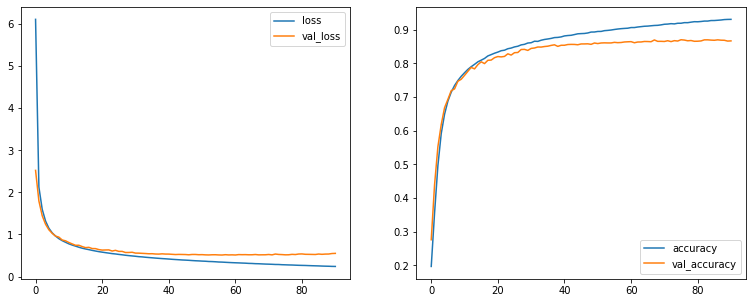

In [104]:
plot_metrics(history_cnn.history)

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [87]:
def plot_n_imgs_with_distribution(x, y, n, model=None, cmap=None):
  fig, axis = plt.subplots(2, n, figsize=(25,8))
  idx = list(range(x.shape[0]))
  np.random.shuffle(idx)

  ax0 = axis[0]
  ax1 = axis[1]

  for i, index in enumerate(idx[:n]):
    ax0[i].axis('off')
    ax0[i].imshow(np.squeeze(x[index]), cmap=cmap)
    x_pred = x[index]                                        # shape (32,32,1)
    x_pred = x_pred[np.newaxis, ...]                         # shape (1,32,32,1)
    pred = model.predict(x_pred)
    y_pred = np.argmax(pred) + 1
    #print("y_pred is: ", y_pred)
    ax0[i].set_title('orig:'+ str(np.squeeze(y[index])+1) + "    pred:" + str(y_pred))

    pred = np.squeeze(pred)
    ax1[i].bar(list(range(len(pred))), pred)

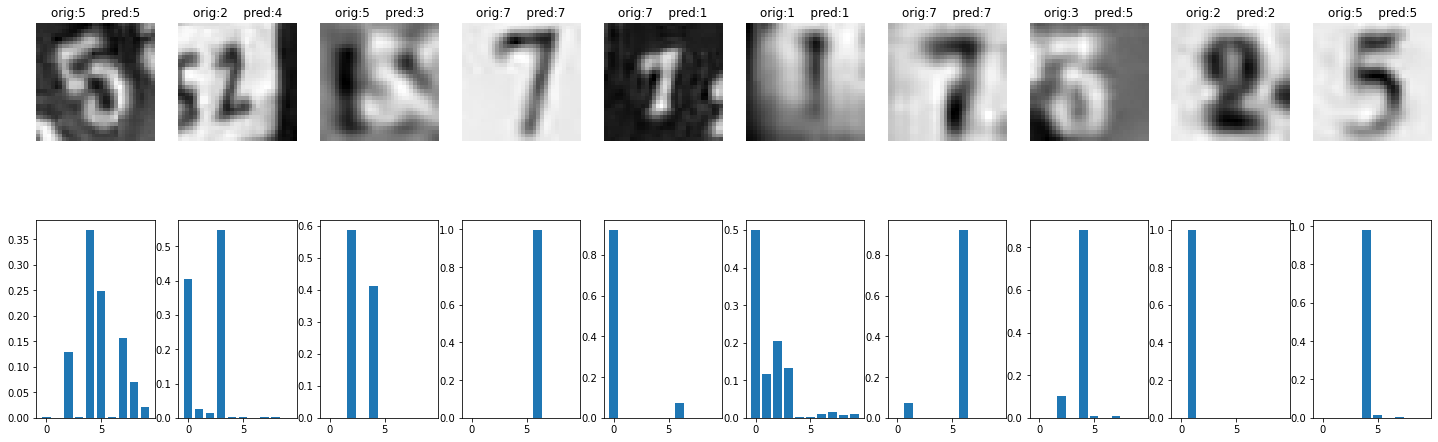

In [90]:
model = get_model()
model.load_weights('/content/gdrive/MyDrive/Colab/Weights/SVHN/svhn_cp_mlp.h5')
plot_n_imgs_with_distribution(x_gray_test, test_y, 10, model=model, cmap='gray')

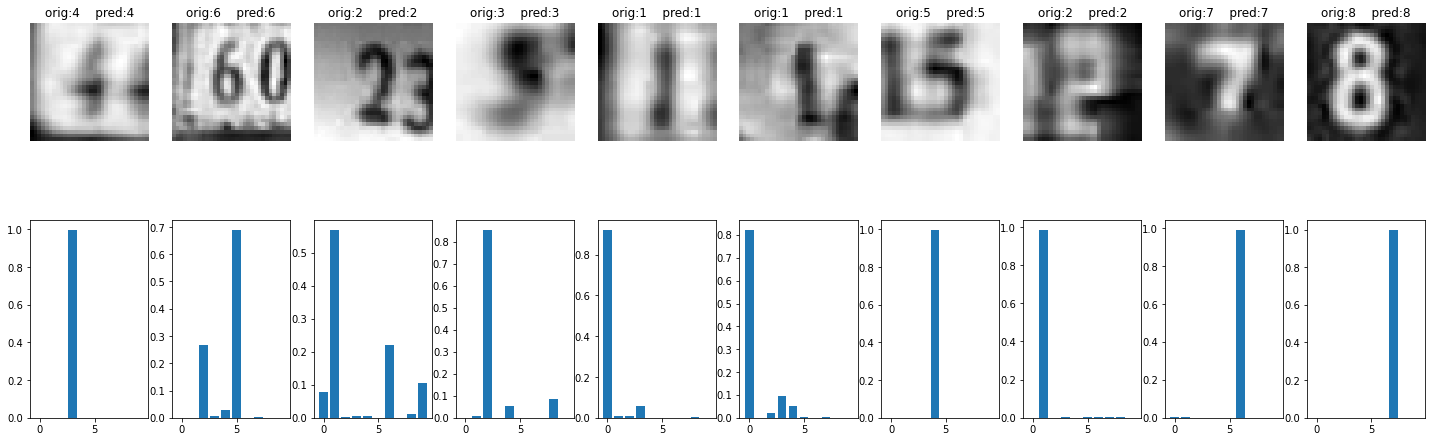

In [105]:
model = get_cnn_model()
model.load_weights('/content/gdrive/MyDrive/Colab/Weights/SVHN/svhn_cp_cnn.h5')
plot_n_imgs_with_distribution(x_gray_test, test_y, 10, model=model, cmap='gray')